<h1 style="text-align: center;">YUBRAJ NIRAULA</h1>
<h1 style="text-align: center;">ARON SBHATU</h1>

<h2 style="text-align: center;">MACHINE LEARNING FINAL PROJECT</h2>

<div style="text-align: center;">
    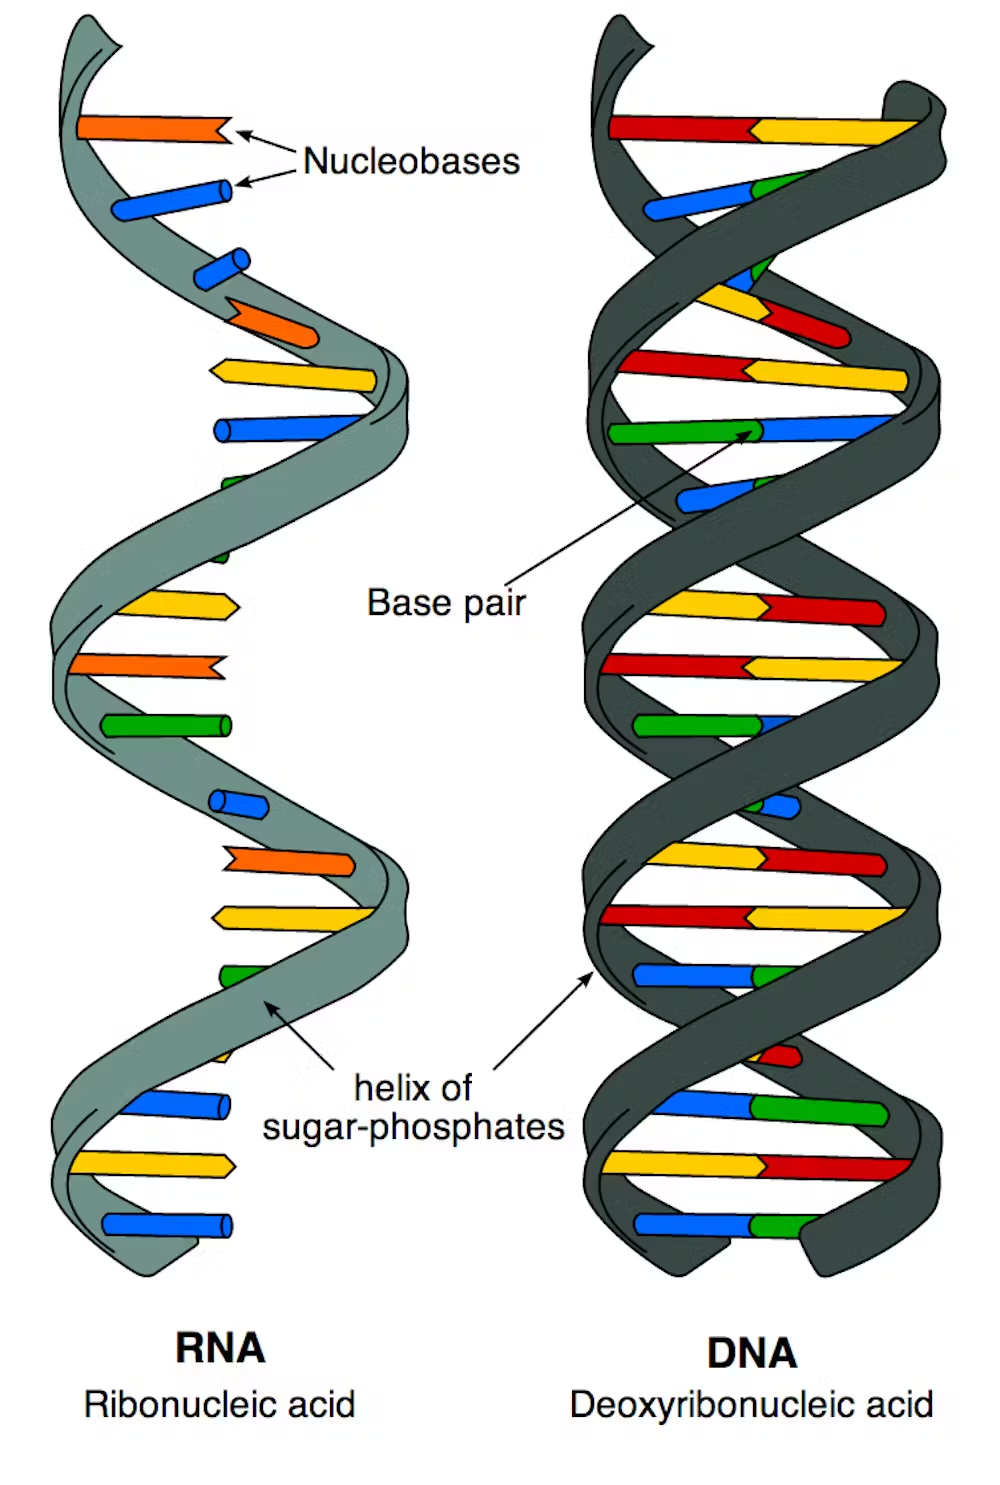
</div>

##  1. Introduction:

### 1.1. Problem Statement

This project aims to predict DNA type and kingdom classification in biological organisms using codon usage frequency data. This dataset comprises codon usage frequencies from a diverse range of organisms, including information on their kingdom classification and DNA type.

Initially, the research was focused on reclassifying the bacteria kingdom into archaea (arc), plasmids (plm), and bacteria proper (bct). For this project, we decided to utilize all the kingdoms as targets and recategorized DNAtypes into 4 catergories as targets.

Our approach to this project follows a structured machine learning pipeline, with a focus on thorough exploratory data analysis (EDA) and iterative model improvement. 


### 1.2. Our Methodology

The key steps in our methodology include:

- **Data Splitting**: Our first step is to split the data into training and testing sets, ensuring we have a holdout set (validation set) for final model evaluation and this will help to avoid data leakage.
- **Feature Importance Analysis**: We use correlation analysis and random forest to identify the most important features for our prediction tasks. Rows with missing values or incorrect datatype in these crucial features are removed to maintain data quality.
- **Model Comparison**: We train and compare multiple models, including Random Forest, and XGBoost, to determine which performs best on our data.
- **Iterative Improvement**: We continuously refine our models based on performance metrics and insights gained throughout the process.

This comprehensive approach allows us to maximize the information available in our dataset while addressing challenges such as missing values and feature selection. By comparing multiple modeling techniques and carefully considering data preprocessing steps, we aim to develop robust predictive models for DNAtype and Kingdom classification based on codon usage patterns.

Our study contributes to the broader field of genomics and may provide valuable tools for researchers working on taxonomic classification, evolutionary studies, and genomic analysis across a wide range of organisms.

### 1.3. About Dataset

### DNA vs. RNA
- **DNA (Deoxyribonucleic Acid)**: The genetic material in most organisms. DNA uses four nucleotide bases: Adenine (A), Thymine (T), Cytosine (C), and Guanine (G).
- **RNA (Ribonucleic Acid)**: Often acts as a messenger carrying instructions from DNA for controlling the synthesis of proteins. RNA uses four nucleotide bases as well, but Uracil (U) is used instead of Thymine (T). So, the bases in RNA are Adenine (A), Uracil (U), Cytosine (C), and Guanine (G).

### Codon Usage
- **Codons**: Both DNA and RNA have sequences of three nucleotides called codons, which correspond to specific amino acids or stop signals during protein synthesis.
- **RNA Codons**: When examining codon usage in RNA, the codons will include U instead of T. For example, the RNA codons for phenylalanine are UUU and UUC, while the equivalent DNA codons would be TTT and TTC.

### This Dataset
Given that this dataset contains codons with "U", it suggests that the data pertains to RNA sequences. This is consistent with studies focused on mRNA (messenger RNA) codon usage, which can be important for understanding gene expression and protein synthesis. Thus it represents RNA codon usage rather than DNA codon usage.

## 2. Loading the dataset and Libraries

### 2.1. Loading necessary Libraries

In [925]:
import pandas as pd
import seaborn as sns
import numpy as np
import time
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import f1_score, classification_report
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

### 2.2. Loading the dataset

In [927]:
df = pd.read_csv('codon_usage.csv', low_memory=False)

In [928]:
df.head()

,Kingdom,DNAtype,SpeciesID,Ncodons,SpeciesName,UUU,UUC,UUA,UUG,CUU,...,CGG,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA
0,vrl,0,100217,1995,Epizootic haematopoietic necrosis virus,0.01654,0.01203,0.00050,0.00351,0.01203,...,0.00451,0.01303,0.03559,0.01003,0.04612,0.01203,0.04361,0.00251,0.00050,0.00000
1,vrl,0,100220,1474,Bohle iridovirus,0.02714,0.01357,0.00068,0.00678,0.00407,...,0.00136,0.01696,0.03596,0.01221,0.04545,0.01560,0.04410,0.00271,0.00068,0.00000
2,vrl,0,100755,4862,Sweet potato leaf curl virus,0.01974,0.0218,0.01357,0.01543,0.00782,...,0.00596,0.01974,0.02489,0.03126,0.02036,0.02242,0.02468,0.00391,0.00000,0.00144
3,vrl,0,100880,1915,Northern cereal mosaic virus,0.01775,0.02245,0.01619,0.00992,0.01567,...,0.00366,0.01410,0.01671,0.03760,0.01932,0.03029,0.03446,0.00261,0.00157,0.00000
4,vrl,0,100887,22831,Soil-borne cereal mosaic virus,0.02816,0.01371,0.00767,0.03679,0.01380,...,0.00604,0.01494,0.01734,0.04148,0.02483,0.03359,0.03679,0.00000,0.00044,0.00131


## 3. Feature Description:

- The **Kingdom** is a 3-letter code corresponding to `xxx' in the CUTG database name: 'arc'(archaea), 'bct'(bacteria), 'phg'(bacteriophage), 'plm' (plasmid), 'pln' (plant), 'inv' (invertebrate), 'vrt' (vertebrate), 'mam' (mammal), 'rod' (rodent), 'pri' (primate), and 'vrl'(virus) sequence entries.

- The **DNAtype** is denoted as an integer for the genomic composition in the species: 0-genomic, 1-mitochondrial, 2-chloroplast, 3-cyanelle, 4-plastid, 5-nucleomorph, 6-secondary_endosymbiont, 7-chromoplast, 8-leucoplast, 9-NA, 10-proplastid, 11-apicoplast, and 12-kinetoplast.

- The species identifier (**SpeciesID**) is an integer, which uniquely indicates the entries of an organism. It is an accession identifier for each different species in the original CUTG database, followed by the first item listed in each genome. 

- The number of codons (**Ncodons**) is the algebraic sum of the numbers listed for the different codons in an entry of CUTG. Codon frequencies are normalized to the total codon count, hence the number of occurrences divided by 'Ncodons' is the codon frequencies listed in the data file. 

- The species' name (**SpeciesName**) is a descriptive label of the name of the species for data interpretations. 

- Lastly, the codon frequencies (**codon**) including 'UUU', 'UUA', 'UUG', 'CUU', etc., are recorded as floats (with decimals in 5 digits).

In [930]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13028 entries, 0 to 13027
Data columns (total 69 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Kingdom      13028 non-null  object 
 1   DNAtype      13028 non-null  int64  
 2   SpeciesID    13028 non-null  int64  
 3   Ncodons      13028 non-null  int64  
 4   SpeciesName  13028 non-null  object 
 5   UUU          13028 non-null  object 
 6   UUC          13028 non-null  object 
 7   UUA          13028 non-null  float64
 8   UUG          13028 non-null  float64
 9   CUU          13028 non-null  float64
 10  CUC          13028 non-null  float64
 11  CUA          13028 non-null  float64
 12  CUG          13028 non-null  float64
 13  AUU          13028 non-null  float64
 14  AUC          13028 non-null  float64
 15  AUA          13028 non-null  float64
 16  AUG          13028 non-null  float64
 17  GUU          13028 non-null  float64
 18  GUC          13028 non-null  float64
 19  GUA 

## 4. Preprocessing and Visualization

### 4.1. Data Cleaning

**The features below are supposed to be float, but the datatype says it is object. This means that there non-numeric values in these columns.**
- UUU          13028 non-null  object 
- UUC          13028 non-null  object 

In [934]:
bad_idx = []

# Check for non-numeric values in 'UUU' column and 'UUC' column
for col in ['UUU', 'UUC']:
    for idx, val in enumerate(df[col]):
        try:
            float(val)
        except ValueError:
            bad_idx.append(idx)
            print(f'The value of {col} column at index({idx}) is {val}')

The value of UUU column at index(486) is non-B hepatitis virus
The value of UUU column at index(5063) is 12;I
The value of UUC column at index(5063) is -


**These two rows (486 and 5063) have non-numeric values. So, it is better to remove these rows altogether.**

In [936]:
# Remove rows with non-numeric values
df = df.drop(bad_idx).reset_index(drop=True)

# Convert the columns to float
df['UUU'] = df['UUU'].astype(float)
df['UUC'] = df['UUC'].astype(float)

# Verify the changes
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13026 entries, 0 to 13025
Data columns (total 69 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Kingdom      13026 non-null  object 
 1   DNAtype      13026 non-null  int64  
 2   SpeciesID    13026 non-null  int64  
 3   Ncodons      13026 non-null  int64  
 4   SpeciesName  13026 non-null  object 
 5   UUU          13026 non-null  float64
 6   UUC          13026 non-null  float64
 7   UUA          13026 non-null  float64
 8   UUG          13026 non-null  float64
 9   CUU          13026 non-null  float64
 10  CUC          13026 non-null  float64
 11  CUA          13026 non-null  float64
 12  CUG          13026 non-null  float64
 13  AUU          13026 non-null  float64
 14  AUC          13026 non-null  float64
 15  AUA          13026 non-null  float64
 16  AUG          13026 non-null  float64
 17  GUU          13026 non-null  float64
 18  GUC          13026 non-null  float64
 19  GUA 

In [937]:
df.isna().any()

Kingdom        False
DNAtype        False
SpeciesID      False
Ncodons        False
SpeciesName    False
               ...  
GAA            False
GAG            False
UAA            False
UAG            False
UGA            False
Length: 69, dtype: bool

**There are no more missing values in the dataframe so we can continue.**

In [939]:
(df==0).sum(axis=0)

Kingdom           0
DNAtype        9265
SpeciesID         0
Ncodons           0
SpeciesName       0
               ... 
GAA              16
GAG             438
UAA            1812
UAG            4329
UGA            2144
Length: 69, dtype: int64

- **From above, we can see that, DNAtype and different codon frequencies have values of 0.**
- **As mentioned above, DNAtypes can range from 0 to 12. 0-genomic, 1-mitochondrial, 2-chloroplast, 3-cyanelle, 4-plastid, 5-nucleomorph, 6-secondary_endosymbiont, 7-chromoplast, 8-leucoplast, 9-NA, 10-proplastid, 11-apicoplast, and 12-kinetoplast.**
- **So, it is normal for DNAtype to have zeros.**
- **The minimum requirements for a functional organism are:**
    - The genetic code uses 20 standard amino acids for protein synthesis.
    - Each amino acid is encoded by at least one codon.
    - There are three stop codons that signal the end of protein synthesis.
- **Given these facts, the theoretical minimum number of codons an organism would need is:
    20 codons (one for each amino acid) + 1 stop codon = 21 codons**
- **This means that each datapoint can have zero values for codon frequencies if they have at least 21 codons. So this is also normal.**
- **Hence, we do not need to impute the data.**
- **But we need to check if there are at least 21 codons frequencies. For this, we check for each datapoint, if the number of non-zeros from column 5 and above is less than 21, and drop them if we find any.**

In [941]:
# We'll use iloc to select columns from index 5 onwards
rows_with_less_than_21_codons = (df.iloc[:, 5:] != 0).sum(axis=1) < 21

# Check if any such rows exist
any_rows_with_less_than_21_codons = rows_with_less_than_21_codons.any()

print(f"Are there any rows with more than 21 zeros (counting from column 5 onwards)? {any_rows_with_less_than_21_codons}")

# To see which rows have less than 21 non-zeros:
rows_indices = df.index[rows_with_less_than_21_codons].tolist()
print(f"Rows with more than 21 zeros (counting from column 5 onwards): {rows_indices}")

Are there any rows with more than 21 zeros (counting from column 5 onwards)? False
Rows with more than 21 zeros (counting from column 5 onwards): []


**There are no such datapoints with less than 21 non-zero codons, so we can continue.**

In [943]:
df.describe()

,DNAtype,SpeciesID,Ncodons,UUU,UUC,UUA,UUG,CUU,CUC,CUA,...,CGG,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA
count,13026.000000,13026.000000,1.302600e+04,13026.000000,13026.000000,13026.000000,13026.000000,13026.000000,13026.000000,13026.000000,...,13026.000000,13026.000000,13026.000000,13026.000000,13026.000000,13026.000000,13026.000000,13026.000000,13026.000000,13026.000000
mean,0.367265,130443.036926,7.961776e+04,0.024818,0.023440,0.020637,0.014104,0.017821,0.018287,0.019045,...,0.005453,0.009930,0.006423,0.024181,0.021164,0.028291,0.021683,0.001640,0.000590,0.006179
std,0.688764,124777.067741,7.197556e+05,0.017628,0.011598,0.020710,0.009280,0.010587,0.014573,0.024252,...,0.006601,0.008574,0.006388,0.013826,0.013039,0.014343,0.015019,0.001785,0.000882,0.010345
min,0.000000,7.000000,1.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,28851.250000,1.602000e+03,0.013910,0.015380,0.005610,0.007103,0.010890,0.007830,0.005302,...,0.001220,0.001690,0.001170,0.012390,0.011860,0.017360,0.009710,0.000560,0.000000,0.000410
50%,0.000000,81971.500000,2.929000e+03,0.021750,0.021905,0.015260,0.013360,0.016130,0.014560,0.009680,...,0.003530,0.009270,0.004545,0.025425,0.019070,0.026085,0.020540,0.001380,0.000420,0.001130
75%,1.000000,222890.500000,9.120000e+03,0.031308,0.029210,0.029495,0.019808,0.022730,0.025110,0.017255,...,0.007150,0.015928,0.010250,0.034190,0.027690,0.036800,0.031128,0.002370,0.000830,0.002890
max,12.000000,465364.000000,4.066258e+07,0.217300,0.091690,0.151330,0.101190,0.089780,0.100350,0.163920,...,0.055540,0.098830,0.058430,0.185660,0.113840,0.144890,0.158550,0.045200,0.025610,0.106700


In [944]:
# This is target 1
df['Kingdom'].unique()

array(['vrl', 'arc', 'bct', 'phg', 'plm', 'pln', 'inv', 'vrt', 'mam',
       'rod', 'pri'], dtype=object)

In [945]:
# This is target 2
df['DNAtype'].unique()

array([ 0,  6,  4,  2,  1,  3,  7,  9,  5, 11, 12])

In [946]:
# Check the number of unique values in SpeciesName
unique_species = df['SpeciesName'].nunique()
print(f'Number of unique species: {unique_species}')


Number of unique species: 13014


- **SpeciesName has too many (13014) unique values, it might be challenging to use effectively. So due to this high cardinality, we can drop the feature instead.**
- **Also, we will drop SpeciesID as they are mere numbering of species and carry no significant meaning to the dataset.**
- **We also drop the targets from feature set X.**

In [948]:
X = df.drop(['Kingdom','DNAtype', 'SpeciesID', 'SpeciesName'], axis=1)
y = df['Kingdom'] # Target 1
z = df['DNAtype'] # Target 2

In [949]:
print("X", X.shape) 
print("y", y.shape)
print("z", z.shape)

X (13026, 65)
y (13026,)
z (13026,)


### 4.2. EDA for Target 1(Kingdom)

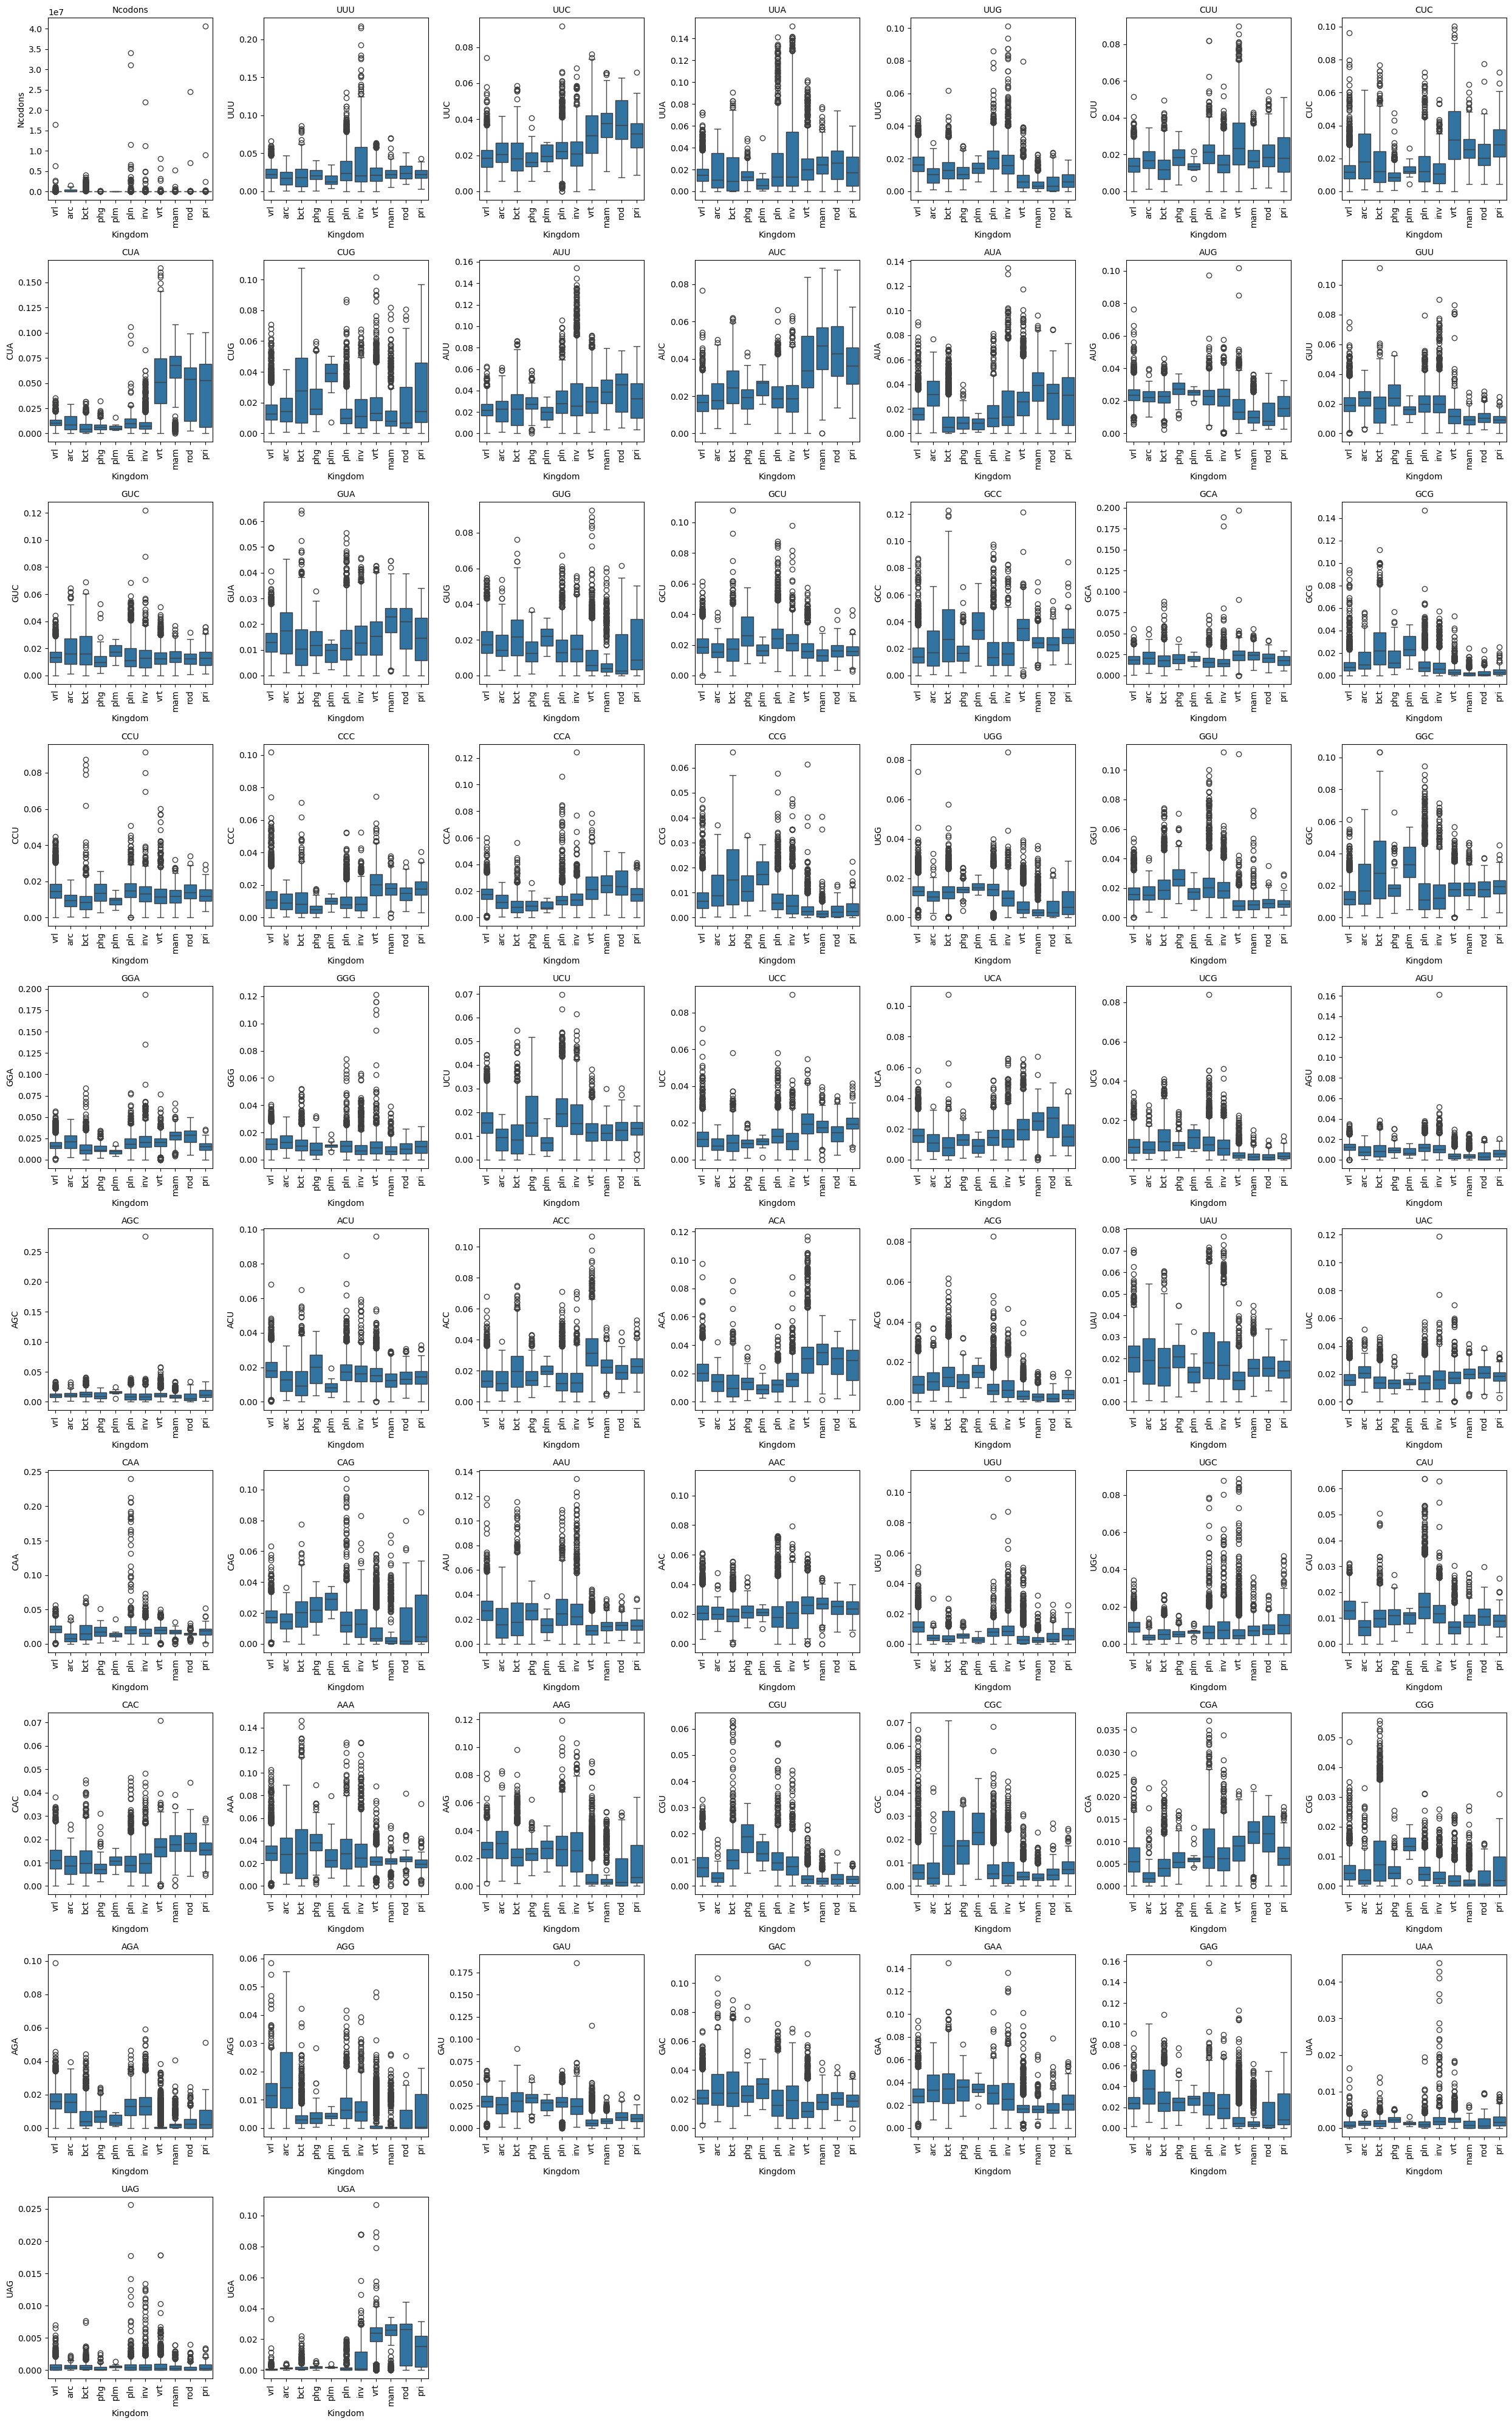

In [951]:
# Determine the number of rows and columns for the grid
num_rows = 10
num_cols = 7

# Create subplots for each codon frequency
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(25, 40))

# Flatten the axes array for easy iteration
axes = axes.flatten()

for ax, col in zip(axes, X.columns):
    sns.boxplot(x='Kingdom', y=col, data=df, ax=ax)
    ax.set_title(f'{col}', fontsize=10)
    # Rotate x-tick labels using tick_params to avoid the warning
    ax.tick_params(axis='x', rotation=90)

# Hide any remaining empty subplots
for i in range(len(X.columns), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

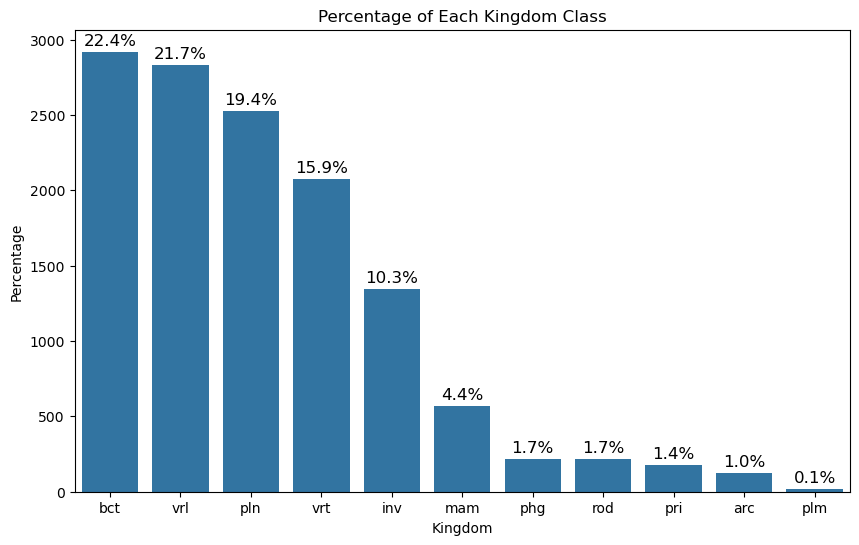

In [952]:
# Create the count plot
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Kingdom', data=df, order=df['Kingdom'].value_counts().index)

# Calculate and annotate percentages
total = len(df['Kingdom'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    yy = p.get_height()
    ax.annotate(percentage, (x, yy), ha='center', va='center', fontsize=12, color='black', xytext=(0, 8), textcoords='offset points')

# Set title and labels
plt.title('Percentage of Each Kingdom Class')
plt.xlabel('Kingdom')
plt.ylabel('Percentage')

plt.show()


**From the countplot, we can see that few of the classes of Kingdom comprise of very small percentage. However, our approach to the problem is predicting Kingdom as accurately as possible. So, we are keeping all the classes as they are.**

### 4.3. EDA for Target 2 (DNAtype)

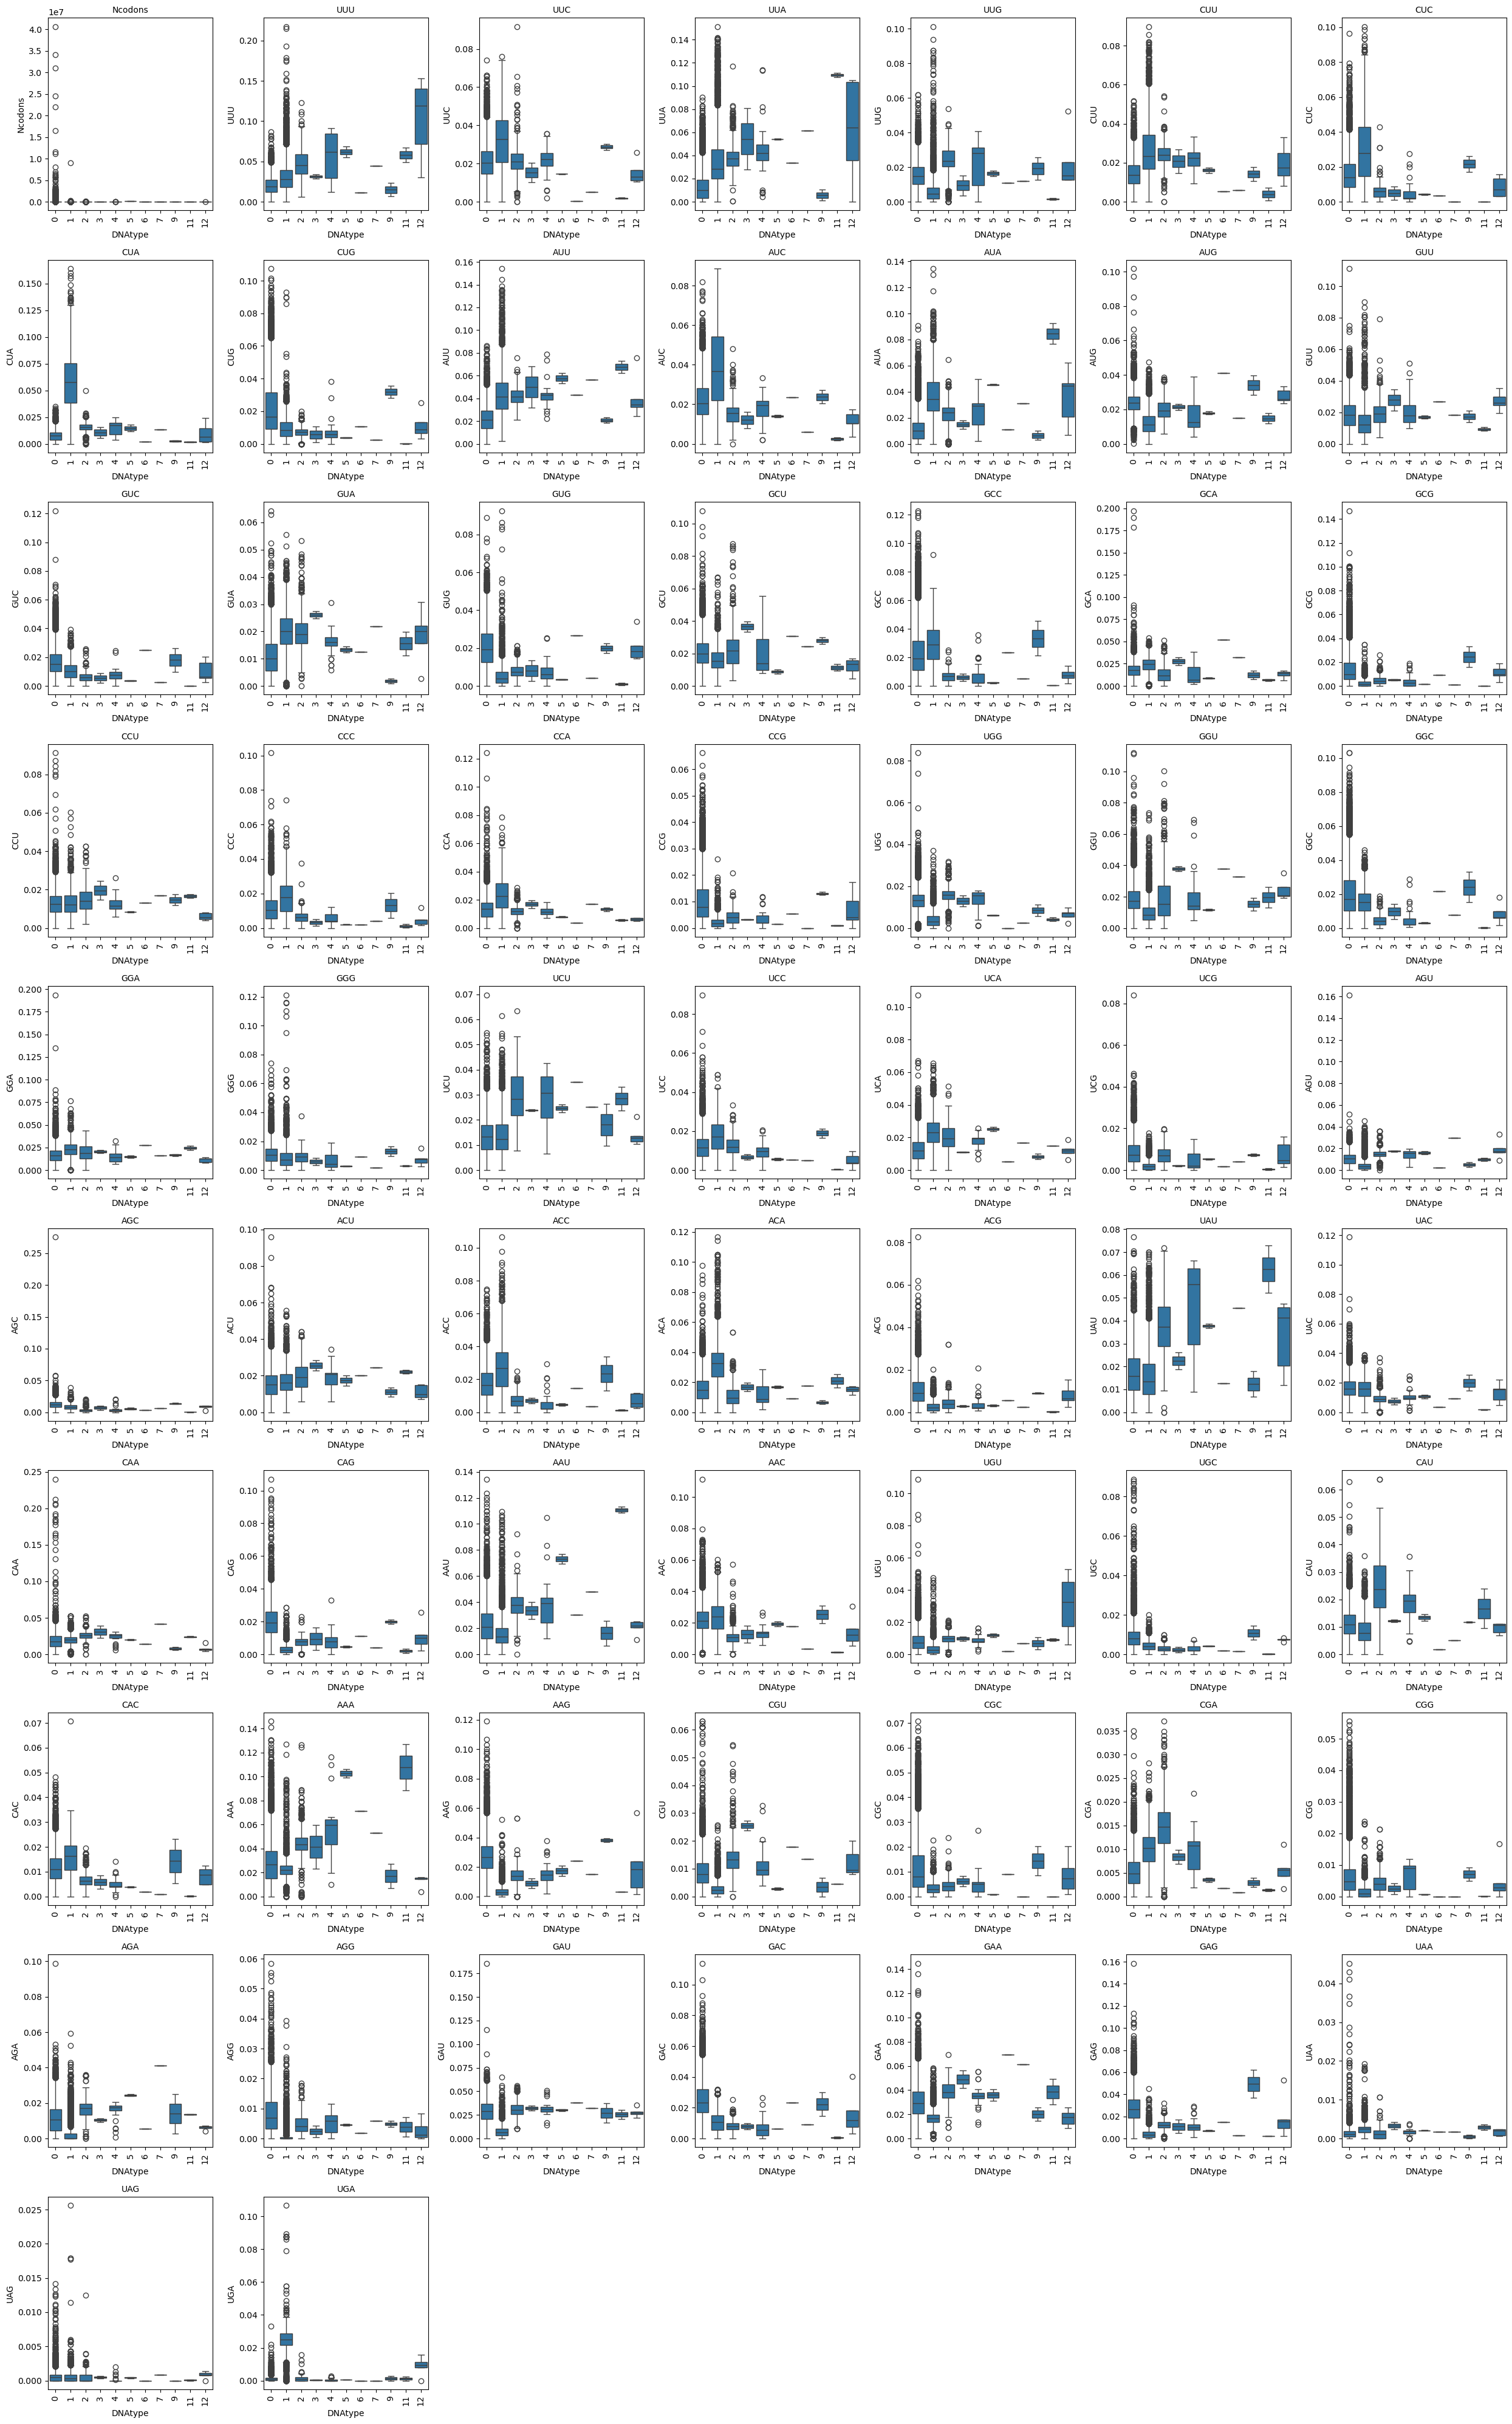

In [955]:
# Determine the number of rows and columns for the grid
num_rows = 10
num_cols = 7

# Create subplots for each codon frequency
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(25, 40))

# Flatten the axes array for easy iteration
axes = axes.flatten()

for ax, col in zip(axes, X.columns):
    sns.boxplot(x='DNAtype', y=col, data=df, ax=ax)
    ax.set_title(f'{col}', fontsize=10)
    # Rotate x-tick labels using tick_params to avoid the warning
    ax.tick_params(axis='x', rotation=90)

# Hide any remaining empty subplots
for i in range(len(X.columns), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

### 4.4. Checking the correlation between Targets

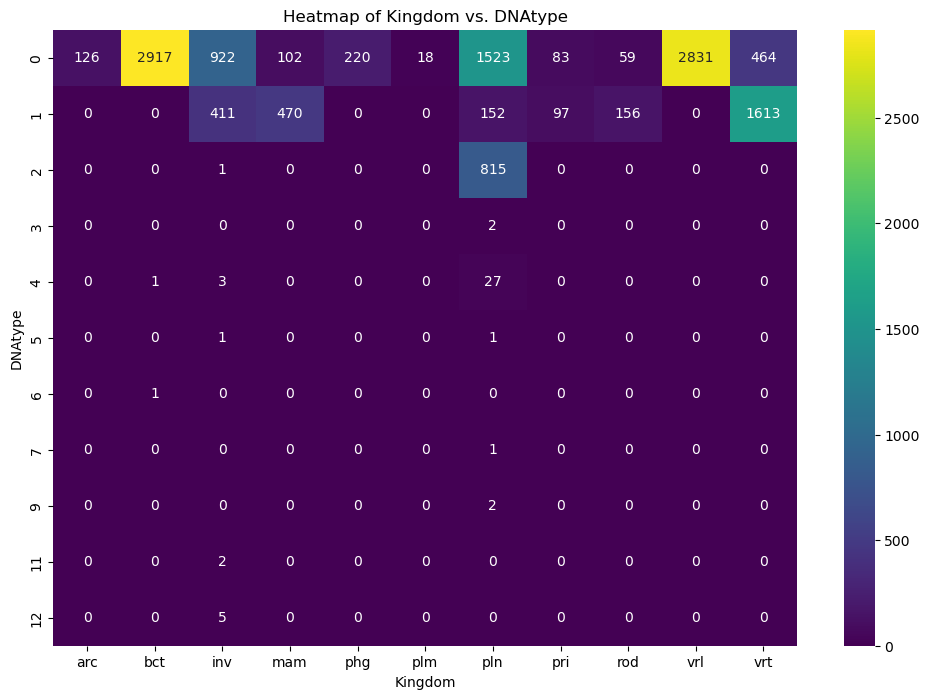

In [957]:
# Create a crosstab to see the relationship between DNAtype and Kingdom
crosstab = pd.crosstab(z, y)

# Heatmap for the crosstab
plt.figure(figsize=(12, 8))
sns.heatmap(crosstab, annot=True, fmt='d', cmap='viridis')
plt.title('Heatmap of Kingdom vs. DNAtype')
plt.xlabel('Kingdom')
plt.ylabel('DNAtype')
plt.show()


**Interpretation of Heatmap**
* The heatmap reveals that the majority of organisms across different Kingdoms are associated with DNAtype categories 0, 1, and 2.
* However, the distribution is not perfectly aligned.
* Based on this diagram, we can predict the DNAtype with some certainty based on Kingdom as some of the Kingdoms have DNAtypes of a certain kind only (for example a Kingdom of type 'bct' is most probably the DNAtype of 0).
* However, we cannot do the same the other way around as DNAtypes are spread around different Kingdoms without any direct correlation (for example if an organism is of DNAtype 0, it could be across any of the Kingdoms). 
* Therefore, it would be prudent to include Kingdom while predicting DNAtype, but removing DNAtype while predicting Kingdom.

**Categorizing Sparsely Distributed DNAtypes**
* Based on the heatmap, it seems that DNATypes from 3 to 12 are sparsely populated.
* Grouping these into a single category like 99 could be a reasonable approach to simplify the classification problem, especially if these categories don't have distinct patterns or sufficient representation to warrant separate treatment.
* This can help reduce the complexity of the model and potentially improve its performance on more common categories.

In [959]:
# Recategorizing DNAtypes from 3 to 12 into category 99
z = z.replace([3, 4, 5, 6, 7, 9, 11, 12], 99)

In [960]:
z.unique()

array([ 0, 99,  2,  1])

**Now we have 4 categories in DNAtype.**

## 5. Splitting Data 

In [963]:
# split into train and test

# First, split the data into training (60%) and a temporary set (40%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)

# Then, split the temporary set into testing (50% of the temp) and validation (50% of the temp)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


## 6. Data Transformation

**Since we are solving our problem with a tree-based model, we don't need to scale the data. Tree-based model are invariant to feature scaling. They split data based on feature thresholds and don't rely on the magnitude of the features, so scaling doesn’t impact the performance of tree-basd model like Random Forest.**

## 7. Working on Target Kingdom (y)

### 7.1. Feature Selection for y

In [968]:
# Initialize the RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

In [969]:
# Fit the model on the training data
rf.fit(X_train, y_train)

# Get feature importances
importances = rf.feature_importances_

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)


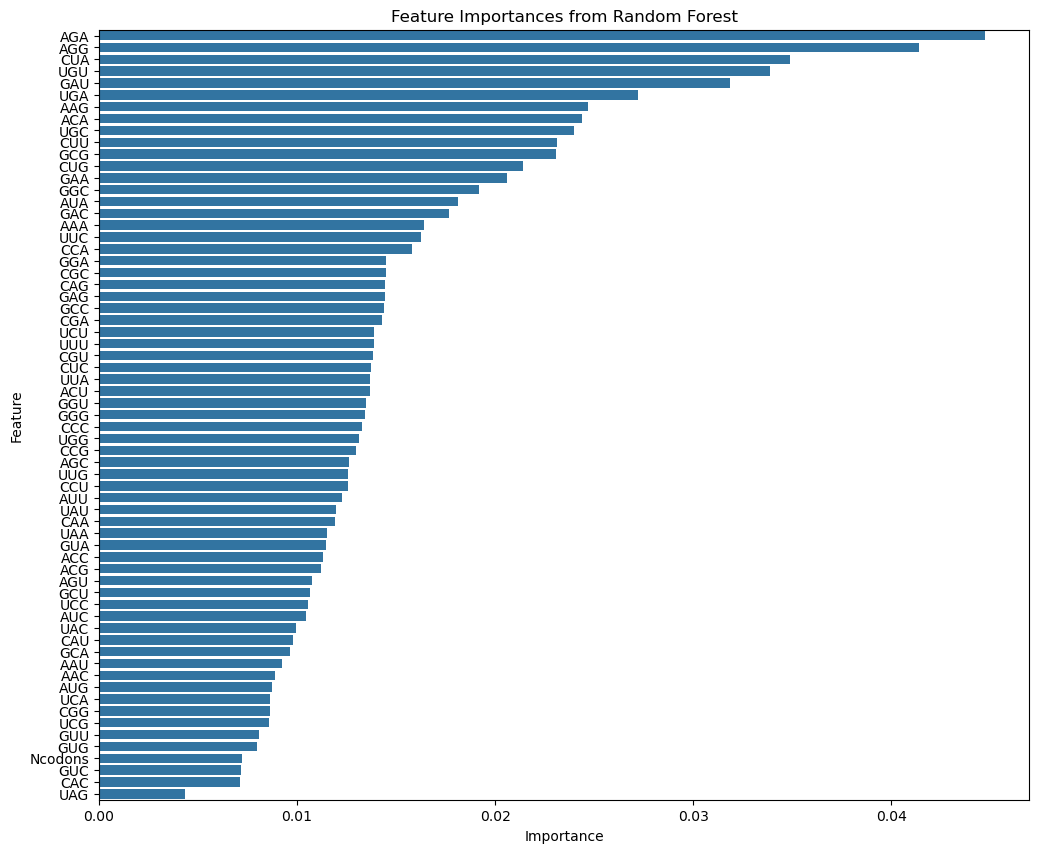

In [970]:
# Plot the feature importances
plt.figure(figsize=(12, 10))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances from Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

**We are using F1 Score as it is useful for evaluating models when you have imbalanced classes. Macro averages the metric across all classes, while weighted averages by support (i.e., the number of true instances for each label).**

In [972]:
# Predict on the test data
y_pred = rf.predict(X_test)

# F1-Score weighted
f1_weighted = f1_score(y_test, y_pred, average='weighted')
print(f'F1 Score (Weighted): {f1_weighted:.4f}')

# Classification Report (includes precision, recall, F1 score for each class)
print("Classification Report:\n", classification_report(y_test, y_pred))

F1 Score (Weighted): 0.8821
Classification Report:
               precision    recall  f1-score   support

         arc       0.90      0.53      0.67        17
         bct       0.92      0.96      0.94       589
         inv       0.89      0.64      0.75       267
         mam       0.85      0.74      0.79       119
         phg       0.88      0.48      0.62        48
         plm       0.00      0.00      0.00         2
         pln       0.87      0.93      0.90       525
         pri       0.94      0.50      0.65        30
         rod       0.96      0.65      0.77        37
         vrl       0.87      0.96      0.91       552
         vrt       0.90      0.96      0.93       419

    accuracy                           0.89      2605
   macro avg       0.82      0.67      0.72      2605
weighted avg       0.89      0.89      0.88      2605



/opt/homebrew/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/homebrew/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/homebrew/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


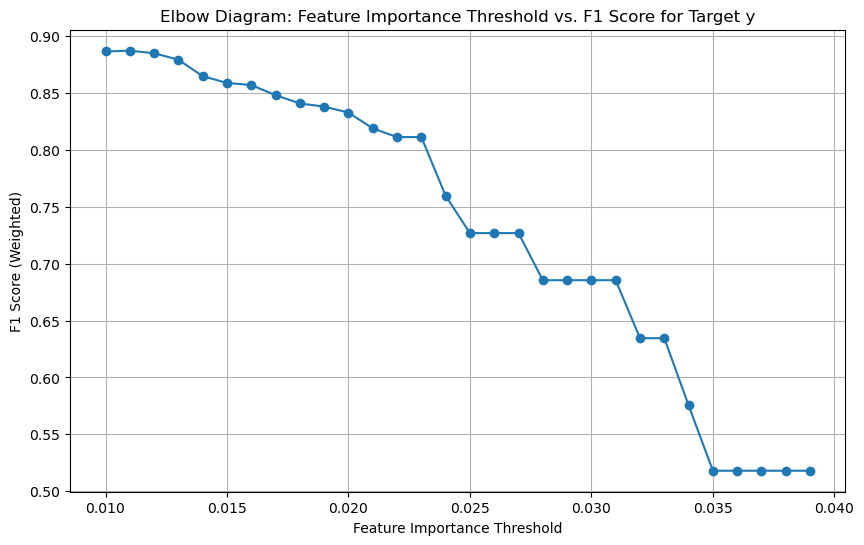

In [973]:
# Initialize lists to store results
thresholds = np.arange(0.01, 0.04, 0.001)  
f1_scores = []

# Iterate through different thresholds
for threshold in thresholds:
    # Select features above the threshold
    selected_features = np.where(importances >= threshold)[0]
    
    # Reduce training and testing data to selected features
    X_train_selected = X_train.iloc[:, selected_features]
    X_test_selected = X_test.iloc[:, selected_features]
    
    # Train the model on selected features
    rf_model_selected = RandomForestClassifier(random_state=42)
    rf_model_selected.fit(X_train_selected, y_train)
    
    # Predict and calculate F1 score
    y_pred = rf_model_selected.predict(X_test_selected)
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    # Store the F1 score
    f1_scores.append(f1)

# Plot the elbow diagram
plt.figure(figsize=(10, 6))
plt.plot(thresholds, f1_scores, marker='o')
plt.title('Elbow Diagram: Feature Importance Threshold vs. F1 Score for Target y')
plt.xlabel('Feature Importance Threshold')
plt.ylabel('F1 Score (Weighted)')
plt.grid(True)

plt.show()

### Interpreting Elbow diagram
- **The Elbow diagram above plots the F1 Score (Weighted) on the y-axis against the Feature Importance Threshold on the x-axis. The purpose of this diagram is to help identify the optimal threshold for selecting features based on their importance when building a model.**
- **The elbow point is where the curve starts to bend, signaling the optimal balance between the number of features selected and the model’s performance.**
- **Looking at the diagram, we can see that the point of maximum curvature on the graph is around 0.018 which is the best threshold for selecting the most important features.**

In [975]:
threshold = 0.0225 # Best Treshold

# Identify the selected features based on the threshold. 0.018 seems to be the peak of the elbow so we are going to select 
# features with that threshold.
selected_features = np.where(importances >= threshold)[0]

# Get the column names of the selected features
selected_columns = X_train.columns[selected_features]

# Create a new X_train dataset with the selected features
X_train_selected = X_train[selected_columns]

# Display the selected columns
print("Selected Columns:", list(selected_columns))

Selected Columns: ['CUU', 'CUA', 'GCG', 'ACA', 'UGU', 'UGC', 'AAG', 'AGA', 'AGG', 'GAU', 'UGA']


In [976]:
# Reset the index of the selected dataset
X_train_selected = X_train_selected.reset_index(drop=True) 

# Display the new X_train dataset with selected features
print("\nX_train dataset with selected features:")
X_train_selected.head()



X_train dataset with selected features:


,CUU,CUA,GCG,ACA,UGU,UGC,AAG,AGA,AGG,GAU,UGA
0,0.00823,0.00830,0.00868,0.02710,0.00332,0.00136,0.02045,0.01902,0.00400,0.04378,0.00091
1,0.00697,0.01713,0.02949,0.01275,0.00996,0.00518,0.02232,0.00777,0.00000,0.03427,0.00040
2,0.01010,0.00459,0.00643,0.01745,0.01286,0.01194,0.02938,0.01745,0.01745,0.03306,0.00184
3,0.01842,0.06368,0.00263,0.02632,0.00263,0.00789,0.00263,0.00263,0.00000,0.00000,0.03158
4,0.03288,0.00400,0.00606,0.01417,0.00635,0.00694,0.02500,0.01259,0.01317,0.02782,0.00124


In [977]:
print(X_train_selected.shape)
print(X_train.shape)

(7815, 11)
(7815, 65)


In [978]:
X_test_selected = X_test[selected_columns]


### 7.2. Training Model for y

In [980]:
# Create the pipelines
rf_pipeline = Pipeline([
    ('clf', RandomForestClassifier(random_state=42))
])

# Define the parameter grids for each model
rf_param_grid = {
    'clf__n_estimators': [100, 200],
    'clf__max_depth': [10, 20],
    'clf__min_samples_split': [2, 5],
}

# Create GridSearchCV objects for each pipeline
rf_grid_search = GridSearchCV(rf_pipeline, rf_param_grid, cv=5, scoring='f1_weighted')

# Start timing before model fitting
start_time = time.time()

# Fit the models
rf_grid_search.fit(X_train_selected, y_train)

# Measure the time taken for model fitting
fit_time = time.time() - start_time
print(f"Time taken for model fitting: {fit_time:.2f} seconds")

# Predict using the best models
rf_best_model = rf_grid_search.best_estimator_

# Start timing before prediction
start_time = time.time()

y_pred_rf = rf_best_model.predict(X_test_selected)
# y_pred_xgb = xgb_best_model.predict(X_test)

# Measure the time taken for prediction
predict_time = time.time() - start_time
print(f"Time taken for prediction: {predict_time:.2f} seconds")

# Evaluate the models using F1 score
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

print(f"F1 Score for Random Forest: {f1_rf}")


Time taken for model fitting: 60.69 seconds
Time taken for prediction: 0.05 seconds
F1 Score for Random Forest: 0.8121771569249472


**XGBoost works with numerical values only. So, we need to use LabelEncoder to encode categorical values.**

In [981]:
# Encode the target labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Create the XGBoost pipeline
xgb_pipeline = Pipeline([
    ('clf', XGBClassifier(random_state=42))
])

# Define the parameter grid for XGBoost
xgb_param_grid = {
    'clf__n_estimators': [100, 200],
    'clf__max_depth': [3, 5],
    'clf__learning_rate': [0.01, 0.1],
}

# Create GridSearchCV object for XGBoost
xgb_grid_search = GridSearchCV(xgb_pipeline, xgb_param_grid, cv=5, scoring='f1_weighted')

# Start timing before model fitting
start_time = time.time()

# Fit the XGBoost model
xgb_grid_search.fit(X_train_selected, y_train_encoded)

# Measure the time taken for model fitting
fit_time = time.time() - start_time
print(f"Time taken for model fitting: {fit_time:.2f} seconds")

# Get the best model from the grid search
xgb_best_model = xgb_grid_search.best_estimator_

# Start timing before prediction
start_time = time.time()

# Predict using the best XGBoost model
y_pred_xgb = xgb_best_model.predict(X_test_selected)

# Measure the time taken for prediction
predict_time = time.time() - start_time
print(f"Time taken for prediction: {predict_time:.2f} seconds")

# Evaluate the model using F1 score
f1_xgb = f1_score(y_test_encoded, y_pred_xgb, average='weighted')

print(f"F1 Score for XGBoost: {f1_xgb}")

Time taken for model fitting: 26.80 seconds
Time taken for prediction: 0.02 seconds
F1 Score for XGBoost: 0.8024191776335369


**Comparing the F1 score between Random Forest model (0.81) and XGBoost model (0.80), we can see that both Random Forest and XGBoost gave similar performance.**

### 7.3. Predicting on validation dataset

#### 7.3.1. Predicting on validation dataset using RandomForest

In [985]:
# Create a new X_val dataset with the selected features
X_val_selected = X_val_[selected_columns]

# Predict using the best RF model
y_val_rf = rf_best_model.predict(X_val_selected)

# Evaluate the models using F1 score
f1_rf_y_v = f1_score(y_val, y_val_rf, average='weighted')

print(f"F1 Score for Random Forest: {f1_rf_y_v}")


F1 Score for Random Forest: 0.7913400003165989


#### 7.3.2. Predicting on validation dataset using XGBoost

In [987]:
y_val_encoded = label_encoder.transform(y_val)

# Predict using the best XGBoost model
y_val_xgb = xgb_best_model.predict(X_val_selected)

# Evaluate the model using F1 score
f1_xgb_y = f1_score(y_val_encoded, y_val_xgb, average='weighted')

print(f"F1 Score for XGBoost: {f1_xgb_y}")

F1 Score for XGBoost: 0.7865861013462808


#### 7.3.3. Comparision between Models for Target Kingdom

**The F1 scores for both the Random Forest and XGBoost models are consistently good across the test and validation datasets, each yielding approximately 79%. This consistency suggests that both models generalize well to unseen data and are not overfitting. Given the comparable performance of the two models, either model could be effectively utilized for this task. However, additional considerations such as training time, interpretability, and specific use-case requirements might influence the final choice between Random Forest and XGBoost. In this case, the training and prediction time is faster with XGBoost model. So, we can conclude that XGBoost is better model for this dataset.**

## 8. Working on Target DNAtype (z) 

### 8.1. Splitting data for z

**As previously mentioned, based on the heatmap, it would be prudent to include Kingdom while predicting DNAtype. For this, we will create a new feature set X_ for predicting DNAtype which includes Kingdom unlike X.**

In [993]:
# recreate feature set with Kingdom
X_ = df.drop(['DNAtype', 'SpeciesID', 'SpeciesName'], axis=1)

In [994]:
# First, split the data into training (60%) and a temporary set (40%)
X_train_, X_temp, z_train, z_temp = train_test_split(X_, z, test_size=0.4, random_state=42)

# Then, split the temporary set into testing (50% of the temp) and validation (50% of the temp)
X_test_, X_val_, z_test, z_val_ = train_test_split(X_temp, z_temp, test_size=0.5, random_state=42)

### 8.2. Feature Selection for z

**In scikit-learn's implementation of Random Forest, all features need to be numeric. This means that categorical features need to be encoded before being used in the model. For this, we will use OneHotEncoder and ColumnTransformer to convert Kingdom into numerical features.**

In [997]:
# 'Kingdom' is a categorical column in X_train_
categorical_features = ['Kingdom']

# One-Hot Encoding pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_features)
    ],
    remainder='passthrough'  # Keep other features as is
)

# Create a pipeline
rf_pipez = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Fit the model
rf_pipez.fit(X_train_, z_train)

# Extract the trained RandomForestClassifier from the pipeline
rf_model_z = rf_pipez.named_steps['classifier']

# Get feature importances from the RandomForestClassifier
importances_z = rf_model_z.feature_importances_

# Since 'Kingdom' was one-hot encoded, we need to handle feature names differently
# First, get the feature names from the preprocessor
encoded_columns = rf_pipez.named_steps['preprocessor'].transformers_[0][1].get_feature_names_out(['Kingdom'])

# Combine the encoded feature names with the rest of the feature names
all_feature_names = list(encoded_columns) + [col for col in X_train_.columns if col not in categorical_features]

# Create a DataFrame for visualization
feature_importance_df_z = pd.DataFrame({
    'Feature': all_feature_names,
    'Importance': importances_z
})

# Sort the DataFrame by importance
feature_importance_df_z = feature_importance_df_z.sort_values(by='Importance', ascending=False)

# Display the feature importance DataFrame
print(feature_importance_df_z)


        Feature  Importance
75          UGA    0.122499
62          AAG    0.095813
18          CUA    0.065852
36          UGG    0.054479
68          AGG    0.044821
..          ...         ...
0   Kingdom_arc    0.000023
4   Kingdom_phg    0.000017
8   Kingdom_rod    0.000007
5   Kingdom_plm    0.000000
7   Kingdom_pri    0.000000

[76 rows x 2 columns]


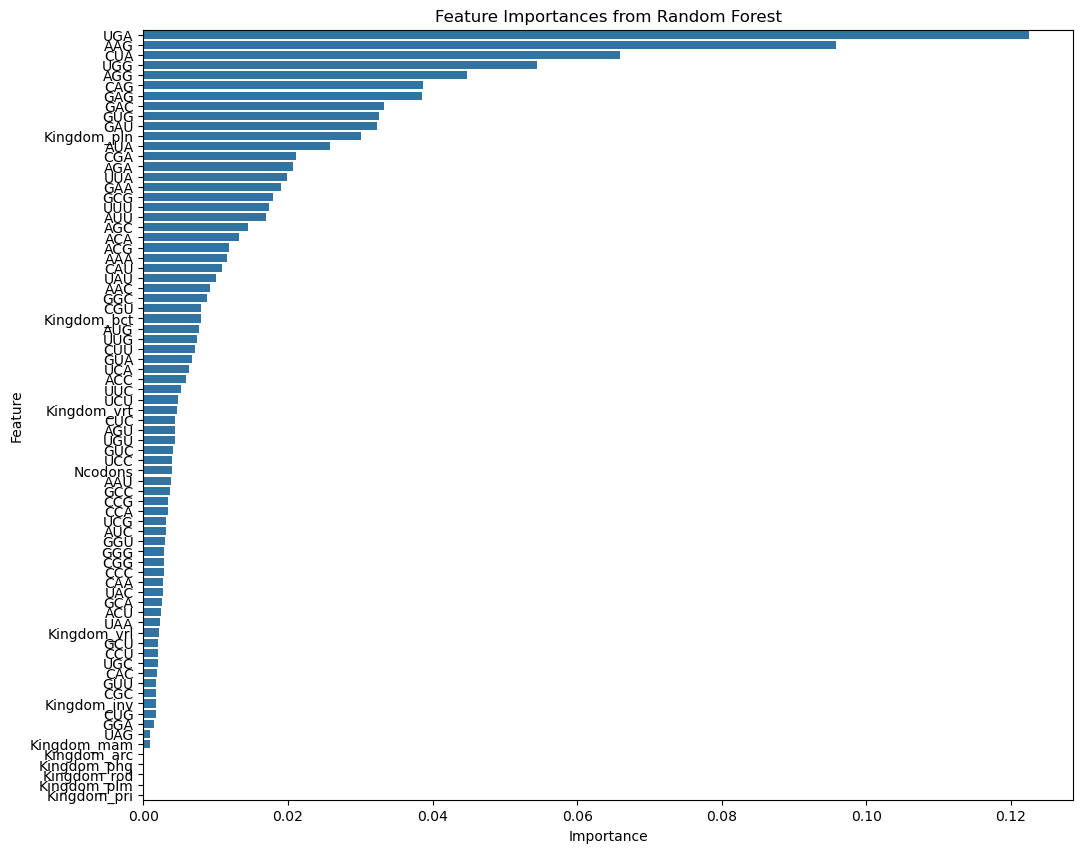

In [998]:
# Plot the feature importances
plt.figure(figsize=(12, 10))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df_z)
plt.title('Feature Importances from Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [999]:
# Predict on the test data
z_pred = rf_pipez.predict(X_test_)

# F1-Score weighted
f1_weighted_z = f1_score(z_test, z_pred, average='weighted')
print(f'F1 Score (Weighted): {f1_weighted_z:.4f}')

# Classification Report (includes precision, recall, F1 score for each class)
print("Classification Report for target DNAtype:\n", classification_report(z_test, z_pred))

F1 Score (Weighted): 0.9884
Classification Report for target DNAtype:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      1850
           1       0.99      0.99      0.99       571
           2       0.95      0.97      0.96       173
          99       1.00      0.09      0.17        11

    accuracy                           0.99      2605
   macro avg       0.99      0.76      0.78      2605
weighted avg       0.99      0.99      0.99      2605



In [1000]:
# Apply fit_transform to the training data
transformed_data = preprocessor.fit_transform(X_train_)

# Get the feature names from the preprocessor
# OneHotEncoder will create column names like 'Kingdom_label'
encoded_columns = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)

# Combine encoded column names with the remaining columns
non_categorical_columns = X_train_.columns.difference(categorical_features, sort=False)
all_columns = list(encoded_columns) + list(non_categorical_columns)

# Convert the numpy array back to a DataFrame
X_train_encoded_ = pd.DataFrame(transformed_data, columns=all_columns)

In [1001]:
# Transform the test data using the preprocessor (without fitting again)
transformed_test_data = preprocessor.transform(X_test_)

# Convert the numpy array back to a DataFrame
X_test_encoded_ = pd.DataFrame(transformed_test_data, columns=all_columns)

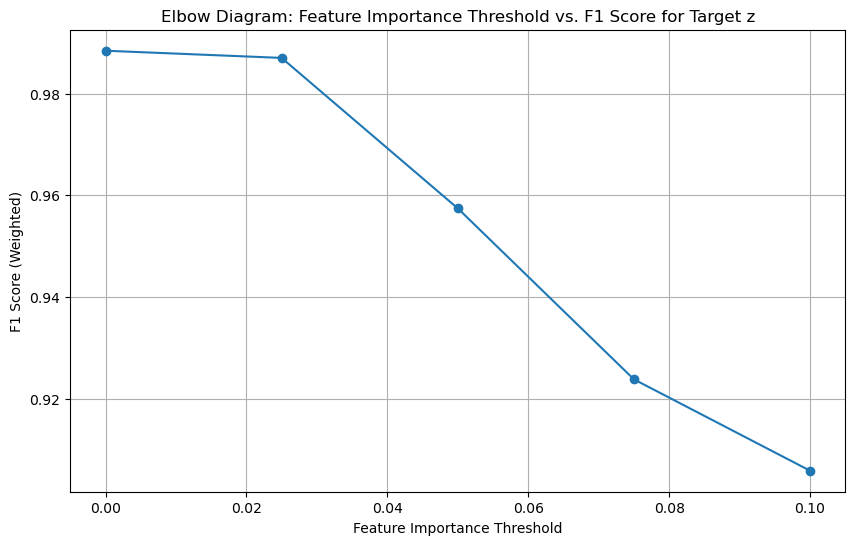

In [1002]:
# Initialize lists to store results
thresholds_z = np.arange(0, 0.12, 0.025)  
f1_scores_z = []

# Iterate through different thresholds
for threshold in thresholds_z:
    # Select features above the threshold
    selected_features_z = np.where(importances_z >= threshold)[0]
    
    # Reduce training and testing data to selected features
    X_train_selected_ = X_train_encoded.iloc[:, selected_features_z]
    X_test_selected_ = X_test_encoded.iloc[:, selected_features_z]
    
    # Train the model on selected features
    rf_model_selected_ = RandomForestClassifier(random_state=42)
    rf_model_selected_.fit(X_train_selected_, z_train)
    
    # Predict and calculate F1 score
    z_pred = rf_model_selected_.predict(X_test_selected_)
    f1_z = f1_score(z_test, z_pred, average='weighted')
    
    # Store the F1 score
    f1_scores_z.append(f1_z)

# Plot the elbow diagram
plt.figure(figsize=(10, 6))
plt.plot(thresholds_z, f1_scores_z, marker='o')
plt.title('Elbow Diagram: Feature Importance Threshold vs. F1 Score for Target z')
plt.xlabel('Feature Importance Threshold')
plt.ylabel('F1 Score (Weighted)')
plt.grid(True)

plt.show()

### Interpreting Elbow diagram
- **The Elbow diagram above plots the F1 Score (Weighted) on the y-axis against the Feature Importance Threshold on the x-axis.**
- **Looking at the diagram, we can see that the point of maximum curvature on the graph is around 0.024 which is the best threshold for selecting the most important features.**

In [1004]:
threshold_ = 0.024 # Best Treshold

# Identify the selected features based on the threshold. 0.024 seems to be the peak of the elbow so we are going to select 
# features with that threshold.
selected_features_ = np.where(importances_z >= threshold_)[0]

# Get the column names of the selected features
selected_columns_ = X_train_encoded.columns[selected_features_]
    
# Create a new X_train dataset with the selected features
X_train_selected_ = X_train_encoded_[selected_columns_]

# Display the selected columns
print("Selected Columns:", list(selected_columns_))

Selected Columns: ['Kingdom_pln', 'CUA', 'AUA', 'GUG', 'UGG', 'CAG', 'AAG', 'AGG', 'GAU', 'GAC', 'GAG', 'UGA']


In [1005]:
# Reset the index of the selected dataset
X_train_selected_ = X_train_selected_.reset_index(drop=True) 

# Display the new X_train dataset with selected features
print("\nX_train dataset with selected features:")
X_train_selected_.head()



X_train dataset with selected features:


,Kingdom_pln,CUA,AUA,GUG,UGG,CAG,AAG,AGG,GAU,GAC,GAG,UGA
0,0.0,0.00830,0.02604,0.00672,0.01079,0.00408,0.02045,0.00400,0.04378,0.01811,0.01562,0.00091
1,0.0,0.01713,0.01395,0.00000,0.00996,0.02112,0.02232,0.00000,0.03427,0.02909,0.02909,0.00040
2,0.0,0.00459,0.01377,0.00826,0.01561,0.02388,0.02938,0.01745,0.03306,0.02020,0.02204,0.00184
3,0.0,0.06368,0.03421,0.00789,0.00000,0.00263,0.00263,0.00000,0.00000,0.03158,0.00000,0.03158
4,0.0,0.00400,0.01594,0.01329,0.01141,0.01982,0.02500,0.01317,0.02782,0.02500,0.02317,0.00124


In [1006]:
# Create a new X_test dataset with the selected features
X_test_selected_ = X_test_encoded_[selected_columns_]

### 8.3. Train model for z

In [1008]:
# Create the pipelines
rf_pipeline = Pipeline([
    ('clf', RandomForestClassifier(random_state=42))
])

# Define the parameter grids for each model
rf_param_grid = {
    'clf__n_estimators': [100, 200],
    'clf__max_depth': [10, 20],
    'clf__min_samples_split': [2, 5],
}

# Create GridSearchCV objects for each pipeline
rf_grid_search = GridSearchCV(rf_pipeline, rf_param_grid, cv=5, scoring='f1_weighted')

# Start timing before model fitting
start_time = time.time()

# Fit the models
rf_grid_search.fit(X_train_selected_, z_train)

# Measure the time taken for model fitting
fit_time = time.time() - start_time
print(f"Time taken for model fitting: {fit_time:.2f} seconds")

# Predict using the best models
rf_best_model_z = rf_grid_search.best_estimator_

# Start timing before predicting
start_time = time.time()

z_pred_rf_z = rf_best_model_z.predict(X_test_selected_)

# Measure the time taken for prediction
predict_time = time.time() - start_time
print(f"Time taken for prediction: {predict_time:.2f} seconds")

# Evaluate the models using F1 score
f1_rf_z = f1_score(z_test, z_pred_rf_z, average='weighted')

print(f"F1 Score for Random Forest: {f1_rf_z}")


Time taken for model fitting: 39.57 seconds
Time taken for prediction: 0.02 seconds
F1 Score for Random Forest: 0.9870236718602498


**XGBoost works with numerical values only. We had previously encoded our target z to allow classification into 4 categores (0, 1, 2, 99). However, XGBoost doesn't work well with non-continuous numbers. So, we need to encode them into continuous numbers. For this we will use LabelEncoder.**

In [1010]:
# Encode target labels
le = LabelEncoder()
z_train = le.fit_transform(z_train)
z_test = le.transform(z_test)

# Create the XGBoost pipeline
xgb_pipeline = Pipeline([
    ('clf', XGBClassifier(random_state=42))
])

# Define the parameter grid for XGBoost
xgb_param_grid = {
    'clf__n_estimators': [100, 200],
    'clf__max_depth': [3, 5],
    'clf__learning_rate': [0.01, 0.1],
}

# Create GridSearchCV object for XGBoost
xgb_grid_search_z = GridSearchCV(xgb_pipeline, xgb_param_grid, cv=5, scoring='f1_weighted')

# Start timing before model fitting
start_time = time.time()

# Fit the XGBoost model
xgb_grid_search_z.fit(X_train_selected_, z_train)

# Measure the time taken for model fitting
fit_time = time.time() - start_time
print(f"Time taken for model fitting: {fit_time:.2f} seconds")

# Get the best model from the grid search
xgb_best_model_z = xgb_grid_search_z.best_estimator_

# Start timing before predicting
start_time = time.time()

# Predict using the best XGBoost model
z_pred_xgb = xgb_best_model_z.predict(X_test_selected_)

# Measure the time taken for prediction
predict_time = time.time() - start_time
print(f"Time taken for prediction: {predict_time:.2f} seconds")

# Evaluate the model using F1 score
f1_xgb_z = f1_score(z_test, z_pred_xgb, average='weighted')

print(f"F1 Score for XGBoost: {f1_xgb_z}")

Time taken for model fitting: 9.66 seconds
Time taken for prediction: 0.00 seconds
F1 Score for XGBoost: 0.9861346105569693


**Comparing the F1 score between Random Forest model (0.98) and XGBoost model (0.98), we can see that both Random Forest and XGBoost gave similar performance.**

### 8.4. Predicting on validation dataset

#### 8.4.1. Predicting on validation dataset using RandomForest

In [1014]:
# Transform the val data using the preprocessor 
transformed_val_data_ = preprocessor.transform(X_val_)

# Convert the numpy array back to a DataFrame
X_val_encoded_ = pd.DataFrame(transformed_val_data_, columns=all_columns)

# Create a new X_val dataset with the selected features
X_val_selected_ = X_val_encoded_[selected_columns_]

# Predict using the best RF model
z_val_rf_z = rf_best_model_z.predict(X_val_selected_)

# Evaluate the models using F1 score
f1_rf_z_v = f1_score(z_val_, z_val_rf_z, average='weighted')

print(f"F1 Score for Random Forest: {f1_rf_z_v}")


F1 Score for Random Forest: 0.9874275120576266


#### 8.4.2. Predicting on validation dataset using XGBoost

In [1016]:
# Predict using the best XGBoost model
z_val_xgb_z = xgb_best_model_z.predict(X_val_selected_)

# Evaluate the model using F1 score
f1_xgb_z = f1_score(z_val_, z_val_xgb_z, average='weighted')

print(f"F1 Score for XGBoost: {f1_xgb_z}")

F1 Score for XGBoost: 0.988180327812762


#### 8.4.3. Comparision between Models for Target Kingdom

**The F1 scores for both the Random Forest and XGBoost models are consistently high across the test and validation datasets, each yielding approximately 98%. This consistency suggests that both models generalize well to unseen data and are not overfitting. Given the comparable performance of the two models, either model could be effectively utilized for this task. However, additional considerations such as training time, interpretability, and specific use-case requirements might influence the final choice between Random Forest and XGBoost. In this case, the training and prediction time is faster with XGBoost model. So, we can conclude that XGBoost is better model for this dataset.**

## 9. Conclusion and Finalizing Model

**In conclusion, the F1 scores for both the Random Forest and XGBoost models are comparable, indicating that they perform similarly in terms of classification accuracy. However, XGBoost significantly outperforms Random Forest in terms of training and prediction speed, making it the more efficient choice. Considering these factors, we can confidently finalize our decision to use XGBoost as the preferred model for our application.**

**The best model for target Kingdom is:**

In [1022]:
xgb_best_model

Pipeline(steps=[('clf',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=5, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=200, n_jobs=None,
                               num_parallel_tree=None,
                               objective='multi:softprob', ...))])

**The best model for target DNAtype is:**

In [1024]:
xgb_best_model_z

Pipeline(steps=[('clf',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=5, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=100, n_jobs=None,
                               num_parallel_tree=None,
                               objective='multi:softprob', ...))])

## 10. Appendix

- **Link to this dataset:**
    https://archive.ics.uci.edu/dataset/577/codon+usage
- **Similar project done on the same dataset:**
    https://github.com/vishalsingha/Kingdom-and-DNAtype-Classification-using-Codon-Bias-Level